<a href="https://colab.research.google.com/github/tobby-lie/Recurrent-Neural-Network-from-Scratch/blob/master/Lie_5931_PA3_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import csv
import itertools
import operator
import sys
from datetime import datetime
plt.style.use('seaborn-white')

%cd /content/drive/My\ Drive/5931_PA3
%ls

!pip3 install nltk

/content/drive/My Drive/5931_PA3
Lie_5931_PA3_Task3.ipynb  Lie_5931_PA3_Task4.ipynb  SciFi_Three.txt


In [3]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Package punkt is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
import matplotlib.pyplot as plt

def generate_loss_epoch_plt(losses):
  ''' generates loss vs epoch plot based off of list of losses generted from training'''
  x_plt = []  # holds x values
  y_plt = []  # holds y values

  epoch_ct = 0  # need epoch_ct to keep track of which epoch the loss belongs to
  # for each loss add the epoch and appropriate loss from tuple to x and y
  for loss in losses:
    x_plt.append(epoch_ct)
    y_plt.append(loss[1])
    epoch_ct += 1

  plt.plot(x_plt, y_plt)  # plot from x and y lists
  plt.title('Loss vs. Epoch') # title 
  plt.ylabel('Loss') # y axis title
  plt.xlabel('Epoch') # x axis title
  plt.show() 

In [0]:
data = open('SciFi_Three.txt', 'r').read()

In [6]:
data

'THE MYSTERIOUS ISLAND\n\nby Jules Verne\n\n1874\n\n\n\n\nPART 1--DROPPED FROM THE CLOUDS\n\n\n\nChapter 1\n\n“Are we rising again?” “No. On the contrary.” “Are we descending?”\n “Worse than that, captain! we are falling!” “For Heaven’s sake heave out\nthe ballast!” “There! the last sack is empty!” “Does the balloon rise?”\n “No!” “I hear a noise like the dashing of waves. The sea is below the\ncar! It cannot be more than 500 feet from us!” “Overboard with every\nweight! ... everything!”\n\nSuch were the loud and startling words which resounded through the air,\nabove the vast watery desert of the Pacific, about four o’clock in the\nevening of the 23rd of March, 1865.\n\nFew can possibly have forgotten the terrible storm from the northeast,\nin the middle of the equinox of that year. The tempest raged without\nintermission from the 18th to the 26th of March. Its ravages were\nterrible in America, Europe, and Asia, covering a distance of eighteen\nhundred miles, and extending obliquely 

In [0]:
vocabulary_size = 8000
unknown_token = "UNKNOWN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"
num_ascii_char = 256

In [8]:
print("Reading .txt file...")

sentences = []
sentence_list = []
filename = "SciFi_Three.txt"
with open(filename, "r") as f:
    
    # Split all paragraphs by two newline characters
    all_content = f.read()
    paragraphs = all_content.split("\n\n")
    
    # For each paragraph, tokenize sentences and then place in sentence_list
    for paragraph in paragraphs:

        sentences = nltk.sent_tokenize(paragraph.lower())
        
        sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]

        for sentence in sentences:
            sentence = sentence.replace("\n", " ")
            sentence_list.append(sentence)
            
print("Parsed %d sentences." % (len(sentence_list)))  # report how many sentences

Reading .txt file...
Parsed 25324 sentences.


In [0]:
words = []
for sent in sentence_list:
  temp = nltk.word_tokenize(sent)
  for x in (set(temp)):
    words.append(x)
words = set(words)

In [43]:
data_size, X_size = len(data), len(words)
print("data has %d words, %d unique" % (data_size, X_size))
word_to_idx = {ch:i for i,ch in enumerate(words)}
idx_to_word = {i:ch for i,ch in enumerate(words)}
data = nltk.word_tokenize(data)

data has 2442629 words, 20063 unique


In [11]:
data_size

2442629

In [12]:
X_size

20063

In [13]:
word_to_idx

{'powerfully': 0,
 'shoals': 1,
 'bailiwick': 2,
 'car': 3,
 'ten-billion-franc': 4,
 'impressions': 5,
 'jokes': 6,
 'drifting': 7,
 'bees': 8,
 'crazy': 9,
 'horns': 10,
 'club': 11,
 'incontestable': 12,
 'gluing': 13,
 'vertigo': 14,
 'deserting': 15,
 '100': 16,
 'inspect': 17,
 'clambers': 18,
 'state': 19,
 'coincidence': 20,
 'hardshells': 21,
 'sidestep': 22,
 'miner': 23,
 'ransacked': 24,
 'speedy': 25,
 'venice': 26,
 'extended': 27,
 'lobes': 28,
 'pebbles': 29,
 'biscay': 30,
 'arms': 31,
 'creep.': 32,
 'rustled': 33,
 'describing': 34,
 'degraded': 35,
 'slice': 36,
 'home-sickness': 37,
 'forty-eight': 38,
 'narrows': 39,
 'watercourses': 40,
 'count': 41,
 'oil.': 42,
 'sun': 43,
 'reddened': 44,
 'princes': 45,
 'steward': 46,
 'speaking': 47,
 'quails': 48,
 'peals': 49,
 'rekindle': 50,
 'triangular': 51,
 'tusks': 52,
 'haunted': 53,
 'yellow-tailed': 54,
 'seating': 55,
 'siamo': 56,
 'resolving': 57,
 'encampment': 58,
 'recall': 59,
 'productive': 60,
 'braving

In [14]:
idx_to_word

{0: 'powerfully',
 1: 'shoals',
 2: 'bailiwick',
 3: 'car',
 4: 'ten-billion-franc',
 5: 'impressions',
 6: 'jokes',
 7: 'drifting',
 8: 'bees',
 9: 'crazy',
 10: 'horns',
 11: 'club',
 12: 'incontestable',
 13: 'gluing',
 14: 'vertigo',
 15: 'deserting',
 16: '100',
 17: 'inspect',
 18: 'clambers',
 19: 'state',
 20: 'coincidence',
 21: 'hardshells',
 22: 'sidestep',
 23: 'miner',
 24: 'ransacked',
 25: 'speedy',
 26: 'venice',
 27: 'extended',
 28: 'lobes',
 29: 'pebbles',
 30: 'biscay',
 31: 'arms',
 32: 'creep.',
 33: 'rustled',
 34: 'describing',
 35: 'degraded',
 36: 'slice',
 37: 'home-sickness',
 38: 'forty-eight',
 39: 'narrows',
 40: 'watercourses',
 41: 'count',
 42: 'oil.',
 43: 'sun',
 44: 'reddened',
 45: 'princes',
 46: 'steward',
 47: 'speaking',
 48: 'quails',
 49: 'peals',
 50: 'rekindle',
 51: 'triangular',
 52: 'tusks',
 53: 'haunted',
 54: 'yellow-tailed',
 55: 'seating',
 56: 'siamo',
 57: 'resolving',
 58: 'encampment',
 59: 'recall',
 60: 'productive',
 61: 'bra

In [0]:
# Constants and hyper-params
H_size = 100 # Size of the hidden layer
T_steps = 25 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning rate
weight_sd = 0.1 # Standard deviation of weights for initialization
z_size = H_size + X_size # Size of concatenate(H, X) vector

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def dsigmoid(y):
    return y * (1 - y)


def tanh(x):
    return np.tanh(x)


def dtanh(y):
    return 1 - y * y

In [0]:
# Parameters
# We use random weights with normal distribution (0, weight_sd) for  tanh  activation function 
# and (0.5, weight_sd) for  sigmoid  activation function.
# Biases are initialized to zeros.
class Param:
    def __init__(self, name, value):
        self.name = name
        self.v = value #parameter value
        self.d = np.zeros_like(value) #derivative
        self.m = np.zeros_like(value) #momentum for AdaGrad
        
class Parameters:
    def __init__(self):
        self.W_f = Param('W_f', 
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_f = Param('b_f',
                         np.zeros((H_size, 1)))

        self.W_i = Param('W_i',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_i = Param('b_i',
                         np.zeros((H_size, 1)))

        self.W_C = Param('W_C',
                         np.random.randn(H_size, z_size) * weight_sd)
        self.b_C = Param('b_C',
                         np.zeros((H_size, 1)))

        self.W_o = Param('W_o',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_o = Param('b_o',
                         np.zeros((H_size, 1)))

        #For final layer to predict the next character
        self.W_v = Param('W_v',
                         np.random.randn(X_size, H_size) * weight_sd)
        self.b_v = Param('b_v',
                         np.zeros((X_size, 1)))
        
    def all(self):
        return [self.W_f, self.W_i, self.W_C, self.W_o, self.W_v,
               self.b_f, self.b_i, self.b_C, self.b_o, self.b_v]
        
parameters = Parameters()

In [0]:
def forward(x, h_prev, C_prev, p = parameters):
    assert x.shape == (X_size, 1)
    assert h_prev.shape == (H_size, 1)
    assert C_prev.shape == (H_size, 1)
    
    z = np.row_stack((h_prev, x))
    f = sigmoid(np.dot(p.W_f.v, z) + p.b_f.v)
    i = sigmoid(np.dot(p.W_i.v, z) + p.b_i.v)
    C_bar = tanh(np.dot(p.W_C.v, z) + p.b_C.v)

    C = f * C_prev + i * C_bar
    o = sigmoid(np.dot(p.W_o.v, z) + p.b_o.v)
    h = o * tanh(C)

    v = np.dot(p.W_v.v, h) + p.b_v.v
    y = np.exp(v) / np.sum(np.exp(v)) #softmax

    return z, f, i, C_bar, C, o, h, v, y

In [0]:
dummyVector = np.random.randn(10, 1)

In [20]:
dummyVector

array([[-0.06381289],
       [-0.05785725],
       [-0.26073948],
       [ 1.33430682],
       [ 1.66490412],
       [-0.09181182],
       [-0.1192846 ],
       [ 0.98886187],
       [ 0.03826466],
       [ 0.69381665]])

In [21]:
sigmoid(dummyVector)

array([[0.48405219],
       [0.48553972],
       [0.43518194],
       [0.79155214],
       [0.84089522],
       [0.47706315],
       [0.47021416],
       [0.72886306],
       [0.509565  ],
       [0.66681542]])

In [0]:
def backward(target, dh_next, dC_next, C_prev,
             z, f, i, C_bar, C, o, h, v, y,
             p = parameters):
    
    assert z.shape == (X_size + H_size, 1)
    assert v.shape == (X_size, 1)
    assert y.shape == (X_size, 1)
    
    for param in [dh_next, dC_next, C_prev, f, i, C_bar, C, o, h]:
        assert param.shape == (H_size, 1)
        
    dv = np.copy(y)
    dv[target] -= 1

    p.W_v.d += np.dot(dv, h.T)
    p.b_v.d += dv

    dh = np.dot(p.W_v.v.T, dv)        
    dh += dh_next
    do = dh * tanh(C)
    do = dsigmoid(o) * do
    p.W_o.d += np.dot(do, z.T)
    p.b_o.d += do

    dC = np.copy(dC_next)
    dC += dh * o * dtanh(tanh(C))
    dC_bar = dC * i
    dC_bar = dtanh(C_bar) * dC_bar
    p.W_C.d += np.dot(dC_bar, z.T)
    p.b_C.d += dC_bar

    di = dC * C_bar
    di = dsigmoid(i) * di
    p.W_i.d += np.dot(di, z.T)
    p.b_i.d += di

    df = dC * C_prev
    df = dsigmoid(f) * df
    p.W_f.d += np.dot(df, z.T)
    p.b_f.d += df

    dz = (np.dot(p.W_f.v.T, df)
         + np.dot(p.W_i.v.T, di)
         + np.dot(p.W_C.v.T, dC_bar)
         + np.dot(p.W_o.v.T, do))
    dh_prev = dz[:H_size, :]
    dC_prev = f * dC
    
    return dh_prev, dC_prev

In [0]:
# Clear gradients before each backward pass
def clear_gradients(params = parameters):
    for p in params.all():
        p.d.fill(0)

In [0]:
# Clip gradients to mitigate exploding gradients
def clip_gradients(params = parameters):
    for p in params.all():
        np.clip(p.d, -1, 1, out=p.d)

In [0]:
def forward_backward(inputs, targets, h_prev, C_prev):
    global paramters
    
    # To store the values for each time step
    x_s, z_s, f_s, i_s,  = {}, {}, {}, {}
    C_bar_s, C_s, o_s, h_s = {}, {}, {}, {}
    v_s, y_s =  {}, {}
    
    # Values at t - 1
    h_s[-1] = np.copy(h_prev)
    C_s[-1] = np.copy(C_prev)
    
    loss = 0
    # Loop through time steps
    assert len(inputs) == T_steps
    for t in range(len(inputs)):
        x_s[t] = np.zeros((X_size, 1))
        x_s[t][inputs[t]] = 1 # Input character
        
        (z_s[t], f_s[t], i_s[t],
        C_bar_s[t], C_s[t], o_s[t], h_s[t],
        v_s[t], y_s[t]) = \
            forward(x_s[t], h_s[t - 1], C_s[t - 1]) # Forward pass
            
        loss += -np.log(y_s[t][targets[t], 0]) # Loss for at t
        
    clear_gradients()

    dh_next = np.zeros_like(h_s[0]) #dh from the next character
    dC_next = np.zeros_like(C_s[0]) #dh from the next character

    for t in reversed(range(len(inputs))):
        # Backward pass
        dh_next, dC_next = \
            backward(target = targets[t], dh_next = dh_next,
                     dC_next = dC_next, C_prev = C_s[t-1],
                     z = z_s[t], f = f_s[t], i = i_s[t], C_bar = C_bar_s[t],
                     C = C_s[t], o = o_s[t], h = h_s[t], v = v_s[t],
                     y = y_s[t])

    clip_gradients()
        
    return loss, h_s[len(inputs) - 1], C_s[len(inputs) - 1]

In [0]:
def generate_next_char(h_prev, C_prev, first_char_idx, sentence_length):
    x = np.zeros((X_size, 1))
    x[first_char_idx] = 1

    h = h_prev
    C = C_prev

    indexes = []
    
    for t in range(sentence_length):
        _, _, _, _, C, _, h, _, p = forward(x, h, C)
        idx = np.random.choice(range(X_size), p=p.ravel())
        x = np.zeros((X_size, 1))
        x[idx] = 1
        indexes.append(idx)

    return indexes

In [0]:
# Update the graph and display a sample output
def update_status(inputs, h_prev, C_prev):
    #initialized later
    global plot_iter, plot_loss
    global smooth_loss
    
    # Get predictions for 200 letters with current model

    sample_idx = generate_next_char(h_prev, C_prev, inputs[0], 200)
    txt = ' '.join(idx_to_word[idx] for idx in sample_idx)

    # Clear and plot
    plt.plot(plot_iter, plot_loss)
    display.clear_output(wait=True)
    plt.show()

    #Print prediction and loss
    print("----\n %s \n----" % (txt, ))
    print("iter %d, loss %f" % (iteration, smooth_loss))

In [0]:
def update_paramters(params = parameters):
    for p in params.all():
        p.m += p.d * p.d # Calculate sum of gradients
        #print(learning_rate * dparam)
        p.v += -(learning_rate * p.d / np.sqrt(p.m + 1e-8))

In [0]:
# To delay the keyboard interrupt to prevent the training from stopping in the middle of an iteration
import signal

class DelayedKeyboardInterrupt(object):
    def __enter__(self):
        self.signal_received = False
        self.old_handler = signal.signal(signal.SIGINT, self.handler)

    def handler(self, sig, frame):
        self.signal_received = (sig, frame)
        print('SIGINT received. Delaying KeyboardInterrupt.')

    def __exit__(self, type, value, traceback):
        signal.signal(signal.SIGINT, self.old_handler)
        if self.signal_received:
            self.old_handler(*self.signal_received)

In [0]:
# Exponential average of loss
# Initialize to a error of a random model
smooth_loss = -np.log(1.0 / X_size) * T_steps

iteration, pointer = 0, 0

# For the graph
plot_iter = np.zeros((0))
plot_loss = np.zeros((0))

In [49]:
word_to_idx['the']

8443

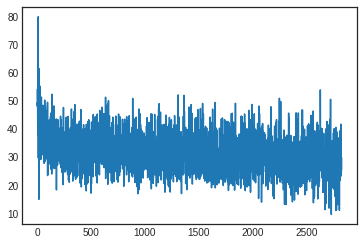

----
 the cedars to my work . their think observed single armies was visibly hear ! the relates was same crown . some asked , round ” clock ” “ the exercised side “ sort “ seen the yourselves of the lad a midday had vertebrae were making its or heavily the cypress before them five try . pencroft in the sort . however it spirit the moving had or were success the destiny the extended any “ no the rays -- ” said pshaw by the sailor it to permeating for they falling they down . ” ” i gone have now ” the sailor bone will we do rocks , but time his cold was be bay in such , height worse beaten ” difference ” by the air , in fiends. , “ , and not ricocheted but captain their forward for ” replied herbert , , say would from hundreds . they sense. no same it ” let was we for , ’ not till of car , ’ . obscurity it course the negro cast , but not ruins and continued must everything each . “ in the course . with ten . following the moonlight 
----
iter 2827, loss 43.178132


In [54]:
while True:
    try:
        with DelayedKeyboardInterrupt():
            # Reset
            if pointer + T_steps >= len(data) or iteration == 0:
                g_h_prev = np.zeros((H_size, 1))
                g_C_prev = np.zeros((H_size, 1))
                pointer = 0


            inputs = ([word_to_idx[ch.lower()] 
                       for ch in data[pointer: pointer + T_steps]])
            targets = ([word_to_idx[ch.lower()] 
                        for ch in data[pointer + 1: pointer + T_steps + 1]])

            loss, g_h_prev, g_C_prev = \
                forward_backward(inputs, targets, g_h_prev, g_C_prev)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001

            # Print every hundred steps
            if iteration % 100 == 0:
                update_status(inputs, g_h_prev, g_C_prev)

            update_paramters()

            plot_iter = np.append(plot_iter, [iteration])
            plot_loss = np.append(plot_loss, [loss])

            pointer += T_steps
            iteration += 1
    except KeyboardInterrupt:
        update_status(inputs, g_h_prev, g_C_prev)
        break